<a href="https://colab.research.google.com/github/architgupta27/PortfolioOptimization/blob/main/PortfolioOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
assets= ['fb', 'amzn', 'appl', 'nflx', 'goog']

In [ ]:
weights= np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
stockStartDate = '2013-01-01'

In [ ]:
today = datetime.today().strftime('%Y-%m-%d')
today

'2024-08-08'

In [ ]:
df = pd.DataFrame()
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo',start = stockStartDate, end = today)['Adj Close']



AttributeError: 'NoneType' object has no attribute 'group'

In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

assets= ['fb', 'amzn', 'appl', 'nflx', 'goog']
weights= np.array([0.2, 0.2, 0.2, 0.2, 0.2])
stockStartDate = '2013-01-01'
today = datetime.today().strftime('%Y-%m-%d')

df = pd.DataFrame()
for stock in assets:
  # Use yfinance to fetch data instead of pandas_datareader
  data = yf.download(stock, start=stockStartDate, end=today)
  df[stock] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APPL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2013-01-01 -> 2024-08-08)')


$APPL: possibly delisted; No price data found  (1d 2013-01-01 -> 2024-08-08)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
import yfinance as yf
import pandas as pd

assets = ['AAPL', 'MSFT', 'GOOGL']  # Replace with your actual asset list
weights= np.array([0.2, 0.2, 0.2])
stockStartDate = '2023-01-01'
today = pd.Timestamp.now().strftime('%Y-%m-%d')

df = pd.DataFrame()

for stock in assets:
    data = yf.download(stock, start=stockStartDate, end=today)
    df[stock] = data['Adj Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,AAPL,MSFT,GOOGL
Date,,,
2023-01-03,124.048042,236.609238,89.017838
2023-01-04,125.327507,226.259186,87.979027
2023-01-05,123.998459,219.553375,86.101181
2023-01-06,128.560867,222.140854,87.239868
2023-01-09,129.086533,224.303726,87.919090
...,...,...,...
2024-08-01,218.360001,417.109985,170.759995
2024-08-02,219.860001,408.489990,166.660004
2024-08-05,209.270004,395.149994,159.250000


In [ ]:
df


,AAPL,MSFT,GOOGL
Date,,,
2023-01-03,124.048042,236.609238,89.017838
2023-01-04,125.327507,226.259186,87.979027
2023-01-05,123.998459,219.553375,86.101181
2023-01-06,128.560867,222.140854,87.239868
2023-01-09,129.086533,224.303726,87.919090
...,...,...,...
2024-08-01,218.360001,417.109985,170.759995
2024-08-02,219.860001,408.489990,166.660004
2024-08-05,209.270004,395.149994,159.250000


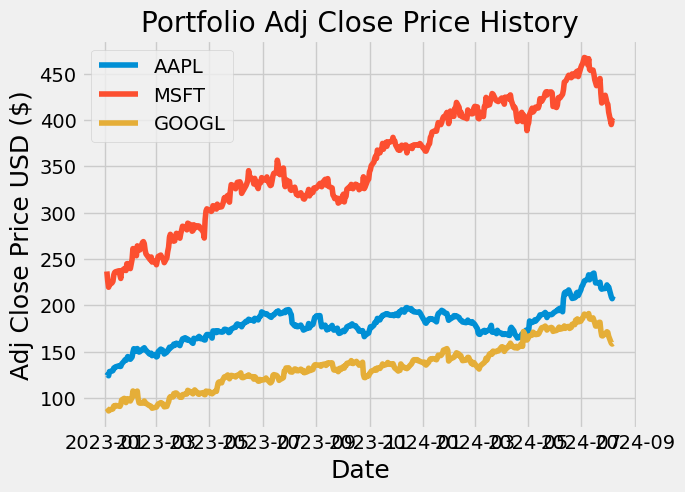

In [ ]:
title = 'Portfolio Adj Close Price History'
my_stocks = df
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)

plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

#my_columns = ['AAPL', 'MSFT', 'GOOGL']

In [ ]:
#Show the daily returns
returns = df.pct_change()
returns

,AAPL,MSFT,GOOGL
Date,,,
2023-01-03,NaN,NaN,NaN
2023-01-04,0.010314,-0.043743,-0.011670
2023-01-05,-0.010605,-0.029638,-0.021344
2023-01-06,0.036794,0.011785,0.013225
2023-01-09,0.004089,0.009736,0.007786
...,...,...,...
2024-08-01,-0.016751,-0.002964,-0.004547
2024-08-02,0.006869,-0.020666,-0.024010
2024-08-05,-0.048167,-0.032657,-0.044462


In [ ]:
#annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,AAPL,MSFT,GOOGL
AAPL,0.048731,0.025750,0.030314
MSFT,0.025750,0.054680,0.038091
GOOGL,0.030314,0.038091,0.088646


In [ ]:
#portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance


0.015214748438354221

In [ ]:
#portfolio volatilty
port_volatility = np.sqrt(port_variance)
port_volatility

0.12334807837317216

In [ ]:
#annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn


0.2241924358157414

In [ ]:
#expected annual return, risk(volatility), and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'
print('Expected annual return: ' + percent_ret)
print('Annual volatility/risk: ' + percent_vols)
print('Annual variance: ' + percent_var)

Expected annual return: 22.0%
Annual volatility/risk: 12.0%
Annual variance: 2.0%


In [ ]:
pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
#portfolio optimization
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.49567), ('MSFT', 0.33429), ('GOOGL', 0.17004)])
Expected annual return: 39.9%
Annual volatility: 19.7%
Sharpe Ratio: 1.93


(0.39942613528473236, 0.19652020653951258, 1.9307232674236199)